# FDA for Task Offloading

In [1]:
import mec
import fda
import numpy as np
import matplotlib.pyplot as plt

# Make Infra

Select underlying Infrastructure (infra_1, infra_2, infra_3, infra_4)

*Contains server information - Data Rate, Data Energy, Task Rate, Task Energy*

In [2]:
infra = mec.infra_1()
print('INFRA:\n',infra.render())

INFRA:
 E,C,A: 1,1,3
VR:[0.22222222 0.2        0.1       ]
VE:[0.56 0.52 0.55]
DE:[0.56 0.52 0.55]
DR:
[[0.         0.2        0.20333333]
 [0.2        0.         0.00333333]
 [0.20333333 0.00333333 0.        ]]


# Make Workflow

create a workflow object that contains tasks to be placed accross servers

In [3]:
nT = 5  # number of tasks per workflow
wf = mec.WORKFLOW(nT) # a new workflow is randomly generated when initializing class
print(wf.render())

V:[ 0.         55.87658814 45.87677561 48.02684339 19.98422136 47.21313421]
D:[90.41298882 78.24669362 72.64021541 51.85202947 60.93641471  2.41404391]


## * New Workflow

Generate a new workflow which requires to be solved by FDA

*Can generate workflow manually by assigning values to wf.V and wf.D*

In [4]:
wf.new_flow()
print(wf.render())

V:[ 0.         13.82498439 26.11675291 29.69494886 10.66112951 45.22066629]
D:[84.46885544 87.42179088 61.84794844 85.76350259 12.52546166 15.14467499]


# Baselines

A baseline to compute efficiency. *see mec.py for definition of efficiency*

In [5]:
bl = mec.BASELINE()
print(bl.total_pies(infra,wf))

243


## compute baselines

actually compute baselines (if soultion space is small)

TOTAL-POLICIES: 243

MIN-Cost: 417.3129918761391
MIN-Cost COUNT: 1
[ 202 ] [1 1 1 1 2]

MAX-Cost: 488.86226564221823
MAX-Cost COUNT: 1
[ 101 ] [2 0 2 0 1]


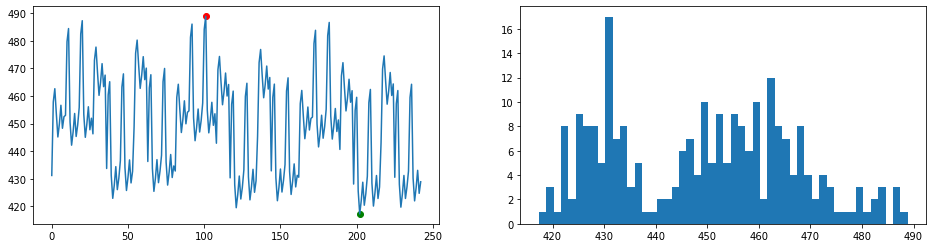

In [6]:
bl.allpie(infra, wf,verbose=0)
bl.render()

# Fitness Function

* Define a fitness function 
* Define flow2sol() function that can convert solutions from an bounded real space to finite discrete space

In [7]:
def flow2sol(x):
    return [ int(abs(i)) % infra.A for i in x ]

def fitness(x):
    return mec.COST(infra, wf, flow2sol(x))

# FDA Agorithm

Initialize the FDA class

In [8]:
F = fda.FDA(wf.T, 0, infra.A, fitness, alpha=6, beta=4)

# FDA Soultions

Optimize using FDA


Initial flow:
 [0.86993234 2.68667679 1.73080759 0.51056533 2.98465085]
[0.36778398 1.49369605 2.14508169 1.48001672 1.74351416]
[0.8259946  2.08108823 0.2134898  2.9518817  1.17690003]
[1.04343779 0.30855625 1.90518965 0.1011147  0.69114091]
[2.86184446 0.2145704  2.73233657 0.52230173 2.29542346]
[0.38224162 0.11710813 1.27459783 2.85854642 2.07963501]


Begin 200 Iterations...
[ITER 1]
best-flow: [0.38224162 0.11710813 1.27459783 2.85854642 2.07963501]  cost: 430.56700622160804
[ITER 2]
best-flow: [ 0.00309952 -1.56091445  2.18120743  2.77880085  2.85093085]  cost: 430.35592132936677
[ITER 3]
best-flow: [ 0.00309952 -1.56091445  2.18120743  2.77880085  2.85093085]  cost: 430.35592132936677
[ITER 4]
best-flow: [ 0.00309952 -1.56091445  2.18120743  2.77880085  2.85093085]  cost: 430.35592132936677
[ITER 5]
best-flow: [ 1.50470161 -1.66712887  2.48755115  2.32976682  2.79176399]  cost: 422.0294871384209
[ITER 6]
best-flow: [ 1.45806842 -1.66383031  2.47803745  2.34371185  2.79360146] 

c:\qpdb\alpha\_pycode\FDA\fda.py:108: RuntimeWarning: invalid value encountered in true_divide
  s0.append( num/np.abs(flow_i - Neighbour_X[j]) )


 [ 1.70273964 -1.93512785 40.57957764 16.58451052 14.51803242]  cost: 417.3129918761391
[ITER 88]
best-flow: [ 1.70273964 -1.93512785 40.57957764 16.58451052 14.51803242]  cost: 417.3129918761391
[ITER 89]
best-flow: [ 1.70273964 -1.93512785 40.57957764 16.58451052 14.51803242]  cost: 417.3129918761391
[ITER 90]
best-flow: [ 1.70273964 -1.93512785 40.57957764 16.58451052 14.51803242]  cost: 417.3129918761391
[ITER 91]
best-flow: [ 1.70273964 -1.93512785 40.57957764 16.58451052 14.51803242]  cost: 417.3129918761391
[ITER 92]
best-flow: [ 1.70273964 -1.93512785 40.57957764 16.58451052 14.51803242]  cost: 417.3129918761391
[ITER 93]
best-flow: [ 1.70273964 -1.93512785 40.57957764 16.58451052 14.51803242]  cost: 417.3129918761391
[ITER 94]
best-flow: [ 1.70273964 -1.93512785 40.57957764 16.58451052 14.51803242]  cost: 417.3129918761391
[ITER 95]
best-flow: [ 1.70273964 -1.93512785 40.57957764 16.58451052 14.51803242]  cost: 417.3129918761391
[ITER 96]
best-flow: [ 1.70273964 -1.93512785 40

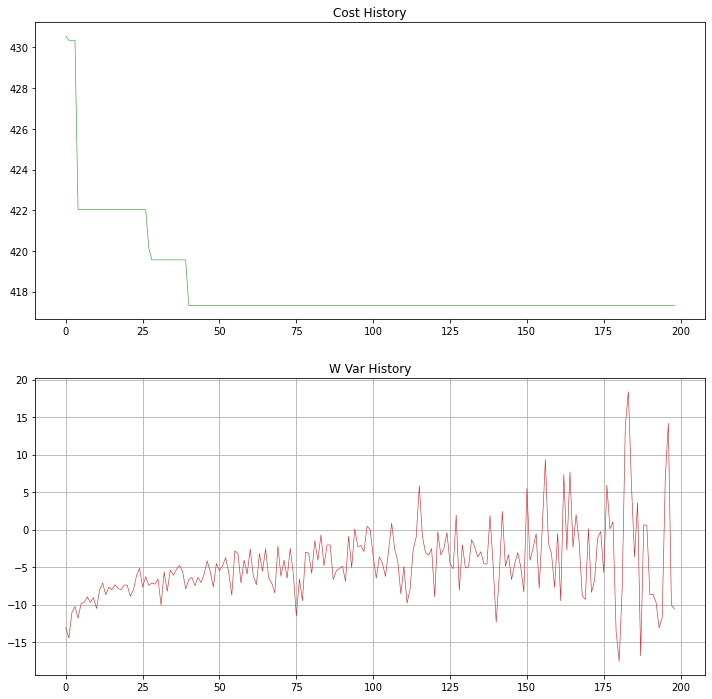

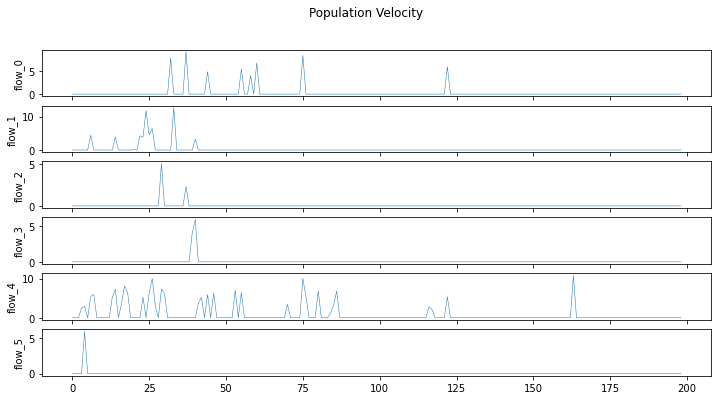

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Best-Flow [0]:	 [  1.43184553  -1.70461696 -37.17344246   7.56033457  11.97696646]
Minimum-Cost:	 417.3129918761391
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Finished!
Elapsed Time: 0:00:01.148231

Best Soultion: [1, 1, 1, 1, 2]
Cost/Fitness: 417.3129918761391
Efficiency: 100.0


In [9]:
best_flow, best_flow_cost, Flow_X, Flow_fitness, W_var_history, C_history, V_history  = F.optimize(200, verbose=2)
bes_solution = flow2sol(best_flow)

print('Best Soultion:', flow2sol(best_flow))
print('Cost/Fitness:', best_flow_cost)
print('Efficiency:', 100*bl.geteff(best_flow_cost))

# Custom Soultion

To compare with other soultions

In [10]:
my_solution = F.get_random_flow()
my_cost = fitness(my_solution)
print('Soultion:', flow2sol(my_solution))
print('Cost/Fitness:', my_cost)
print('Efficiency:', 100*bl.geteff(my_cost))

Soultion: [0, 2, 2, 2, 0]
Cost/Fitness: 438.81439192209757
Efficiency: 69.94882140068334
